<a href="https://colab.research.google.com/github/kaggle-colab-comp/space-titanic/blob/main/space_titanic_july14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install shap
#!pip install shap lime


Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn import preprocessing
import shap
import lime
import lime.lime_tabular

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc



# 1)  Load data

Once the train and test data from the [Kaggle Challenge webpage](https://www.kaggle.com/competitions/spaceship-titanic/data) is uploaded onto your GitHub  repository, it can be read into this Colab notebook.

Use the code provided below to do this (adding the correct paths to your own GitHub data). See the notes & videos in [Lecture 4](https://herts.instructure.com/courses/113392/files/8945743?module_item_id=3831910) for more details.





In [ ]:

training_data = "https://raw.githubusercontent.com/kaggle-colab-comp/space-titanic/main/train.csv?token=GHSAT0AAAAAACUPTFY62ALKTHUV77ZIAXVQZUKIL4Q"
train = pd.read_csv(training_data)
print(train.shape)
print(train.info())
train.head()

(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
test_data = 'https://raw.githubusercontent.com/kaggle-colab-comp/space-titanic/main/test.csv?token=GHSAT0AAAAAACUPTFY6H6MK4L3UHHUYADD6ZUKIOFQ'
test = pd.read_csv(test_data)
print(test.shape)
print(test.info())
test.head()


(4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

# 2) EDA

Here, you can show plots illustrating the initial dataset. This will help you with "domain knowledge" and identify any missing values.

The **missingno** package provides some useful tools for visualising missing data, for example the "missing data" matrix shown below:

<Axes: >

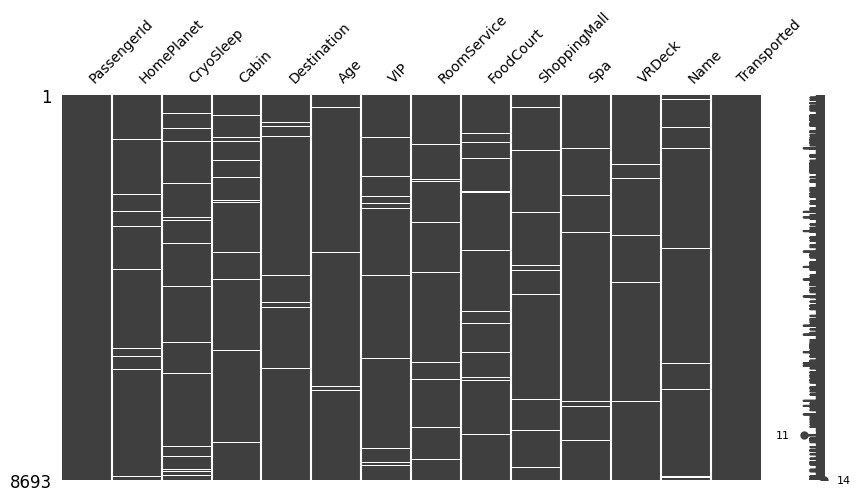

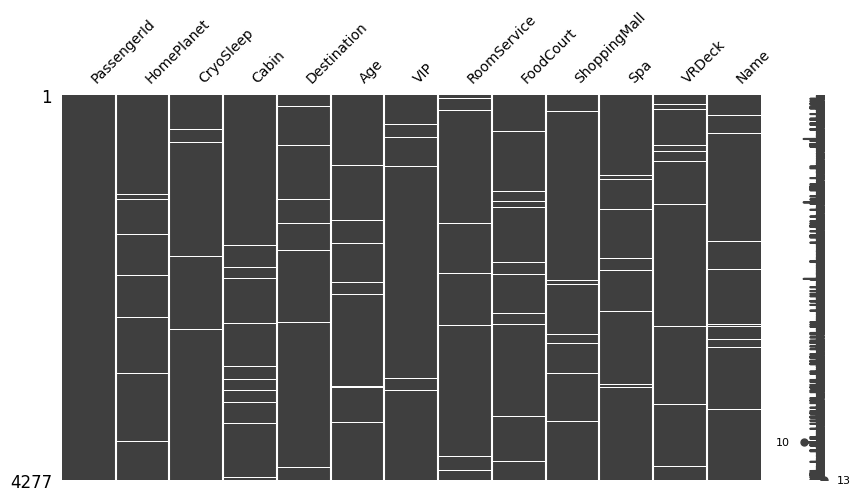

In [ ]:
msno.matrix(train,figsize=(10,5),fontsize=10)
msno.matrix(test,figsize=(10,5),fontsize=10)


Results without any preprocessing from orignal data

In [ ]:
# Making predictions  from original dataset:
# encoding the data

target_column = 'Transported'

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
train_imputed = pd.DataFrame(imputer.fit_transform(train))
train_imputed.columns = train.columns

# Encoding categorical features
label_encoders = {}
for column in train_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_imputed[column] = le.fit_transform(train_imputed[column])
    label_encoders[column] = le

# Split the data into train and test
train_o = train_imputed.sample(frac=0.7, random_state=123)
test_o = train_imputed.drop(train_o.index)

# Define the model
model = RandomForestRegressor(random_state=123)

# Train the model on original data
model.fit(train_o.drop(target_column, axis=1), train_o[target_column])

# Making predictions
predictions = model.predict(test_o.drop(target_column, axis=1))

# Calculate MSE
mse = mean_squared_error(test_o[target_column], predictions)
print(f'MSE without pre-processing: {mse}')

MSE without pre-processing: 0.14399486196319017


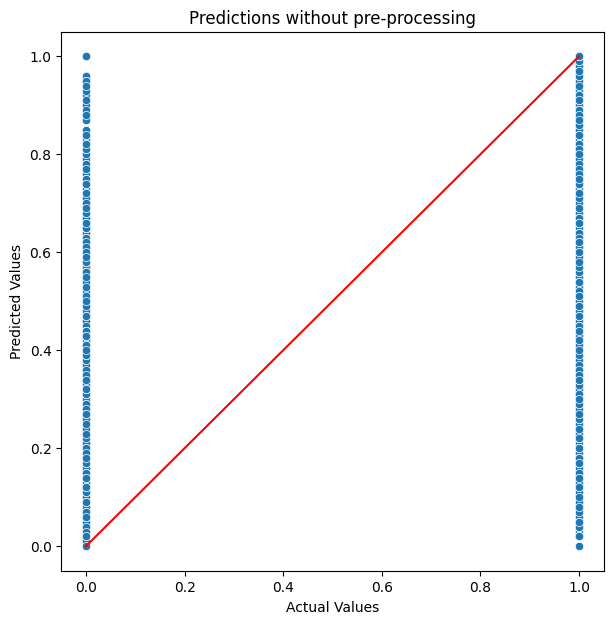

In [ ]:
# Plot predictions from the original dataset
df_original = pd.DataFrame({'actual': test_o[target_column], 'predicted': predictions})  # Create a dataframe to plot
df_original.name = "without pre-processing"
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_original, x='actual', y='predicted')
plt.plot([min(df_original['actual']), max(df_original['actual'])], [min(df_original['actual']), max(df_original['actual'])], color='red')  # plot one-to-one line for reference
plt.title('Predictions ' + df_original.name)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Now that we know without preprocessing results are not quite good we are performing EDA for better understanding

**Checking if data is balanced**

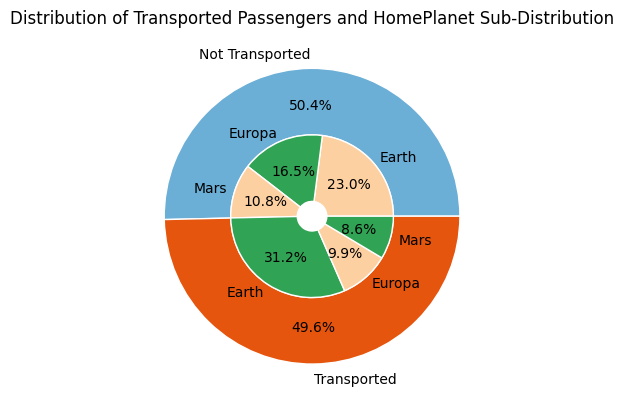

In [ ]:
# EDA: Pie chart
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1, 4])
inner_colors = cmap([7, 8, 7, 8])
size = 0.45
pctdist = 0.75

# Counts of people who were transported or not
df_tot = train['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance=pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported', 'Transported']
)

# Counts of transported passengers, by HomePlanet
df_transported = train.HomePlanet[train['Transported'] == 1].value_counts()

# Counts of non-transported passengers, by HomePlanet
df_not_transported = train.HomePlanet[train['Transported'] == 0].value_counts()

# Concatenate arrays, for use in inner pie chart
df_transported_by_planet = np.concatenate((np.array(df_transported), np.array(df_not_transported)))

# Inner pie chart (to show sub-distribution of "HomePlanet")
ax.pie(
    df_transported_by_planet,
    autopct='%1.1f%%',
    radius=1.0 - size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Earth', 'Europa', 'Mars', 'Earth', 'Europa', 'Mars']
)
plt.title('Distribution of Transported Passengers and HomePlanet Sub-Distribution')
plt.show()


Applying Bar charts to know if data has appropriate distributed freatures

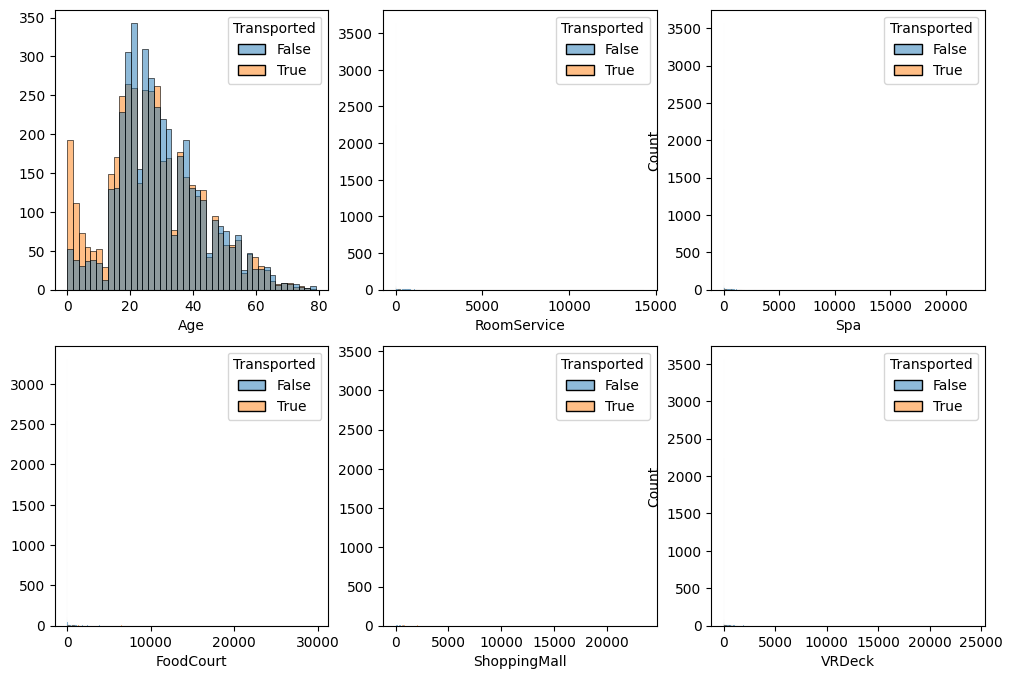

In [ ]:
# EDA: Basic bar plots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(x='Age', data=train, hue='Transported', ax=axs[0, 0])
sns.histplot(x='RoomService', data=train, hue='Transported', ax=axs[0, 1])
sns.histplot(x='FoodCourt', data=train, hue='Transported', ax=axs[1, 0])
sns.histplot(x='ShoppingMall', data=train, hue='Transported', ax=axs[1, 1])

axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')

# Add bar plots of other interesting features from this dataset too
sns.histplot(x='Spa', data=train, hue='Transported', ax=axs[0, 2])
sns.histplot(x='VRDeck', data=train, hue='Transported', ax=axs[1, 2])

plt.show()


In [ ]:
# Data cleaning and imputation:

# Set 0s to NaNs in 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' columns
columns_to_replace = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for column in columns_to_replace:
    train[column].replace(0, np.nan, inplace=True)

# Replace NaNs with mean value
train.fillna(train.mean(skipna=True, numeric_only=True), inplace=True)





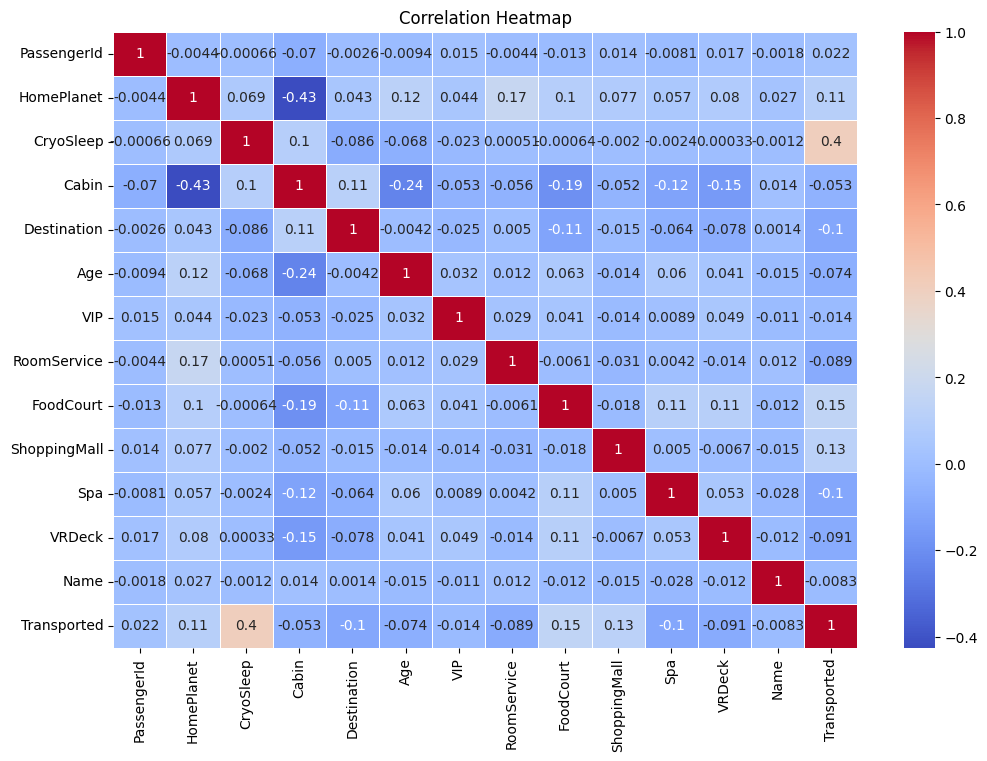

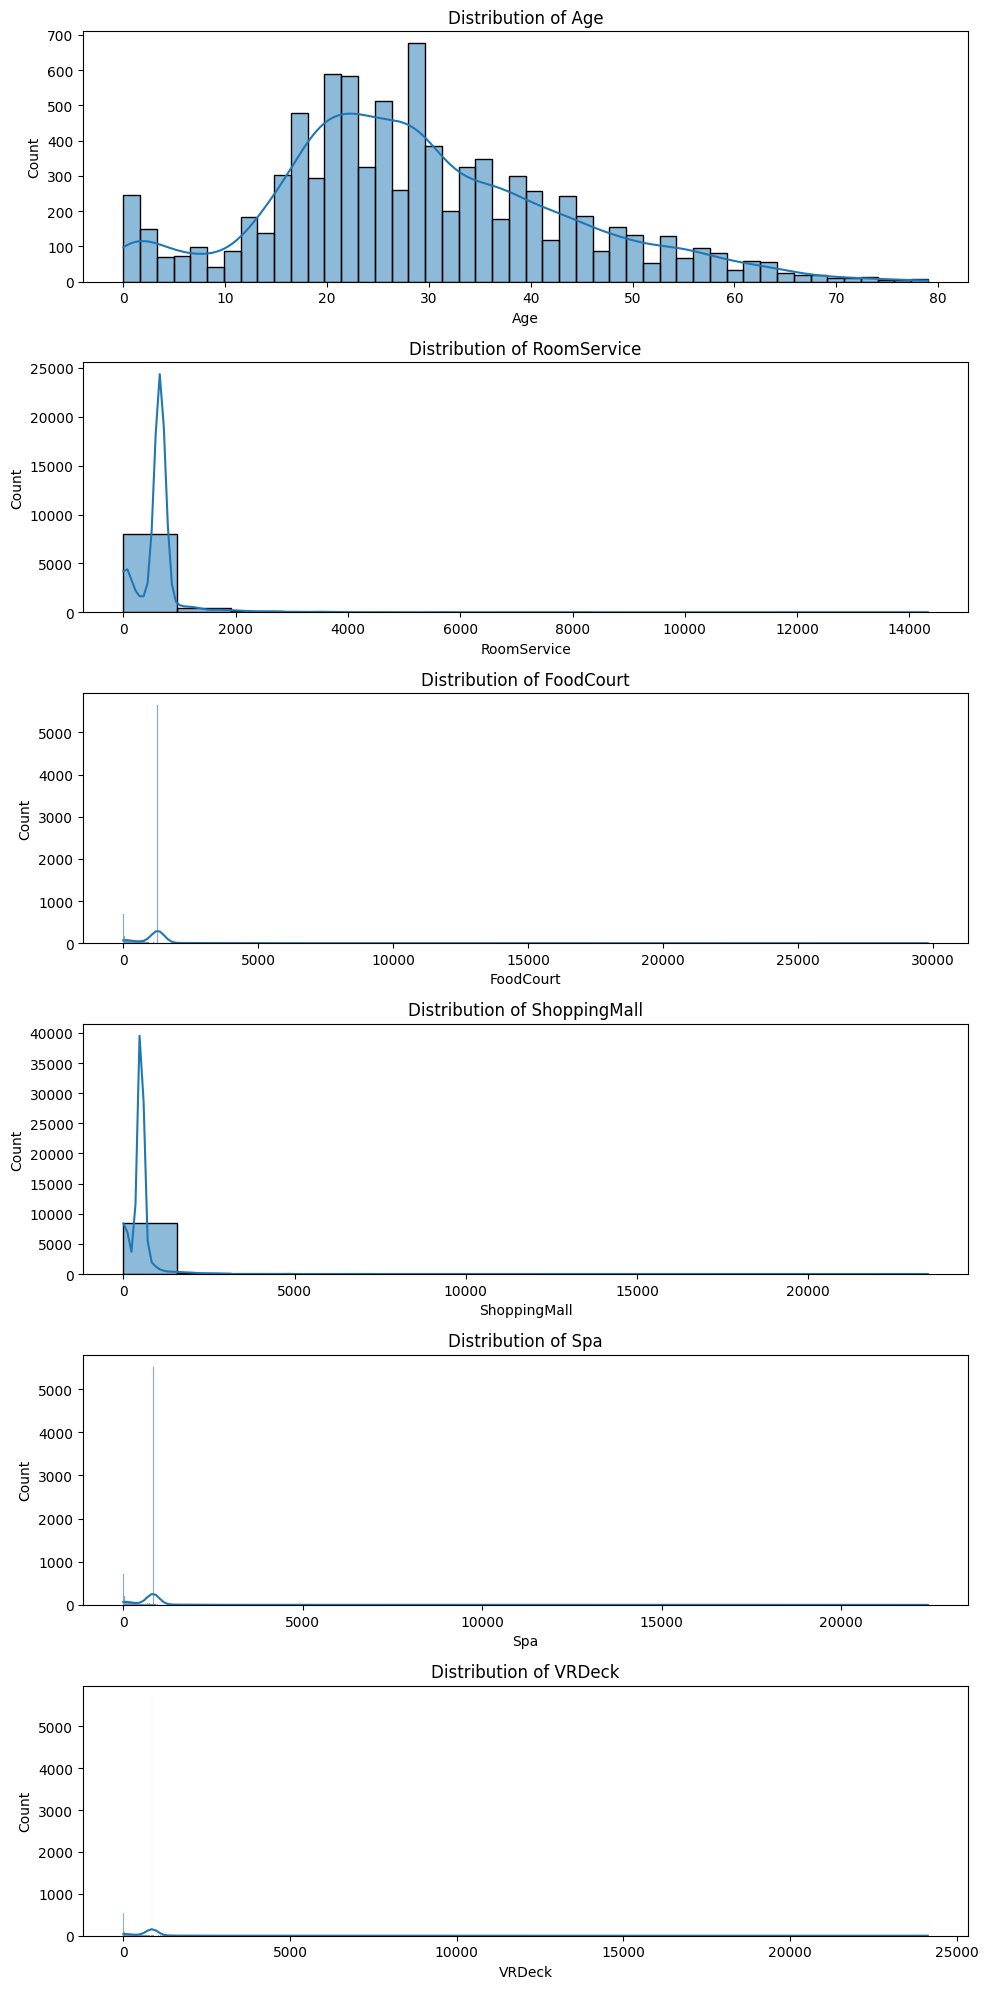

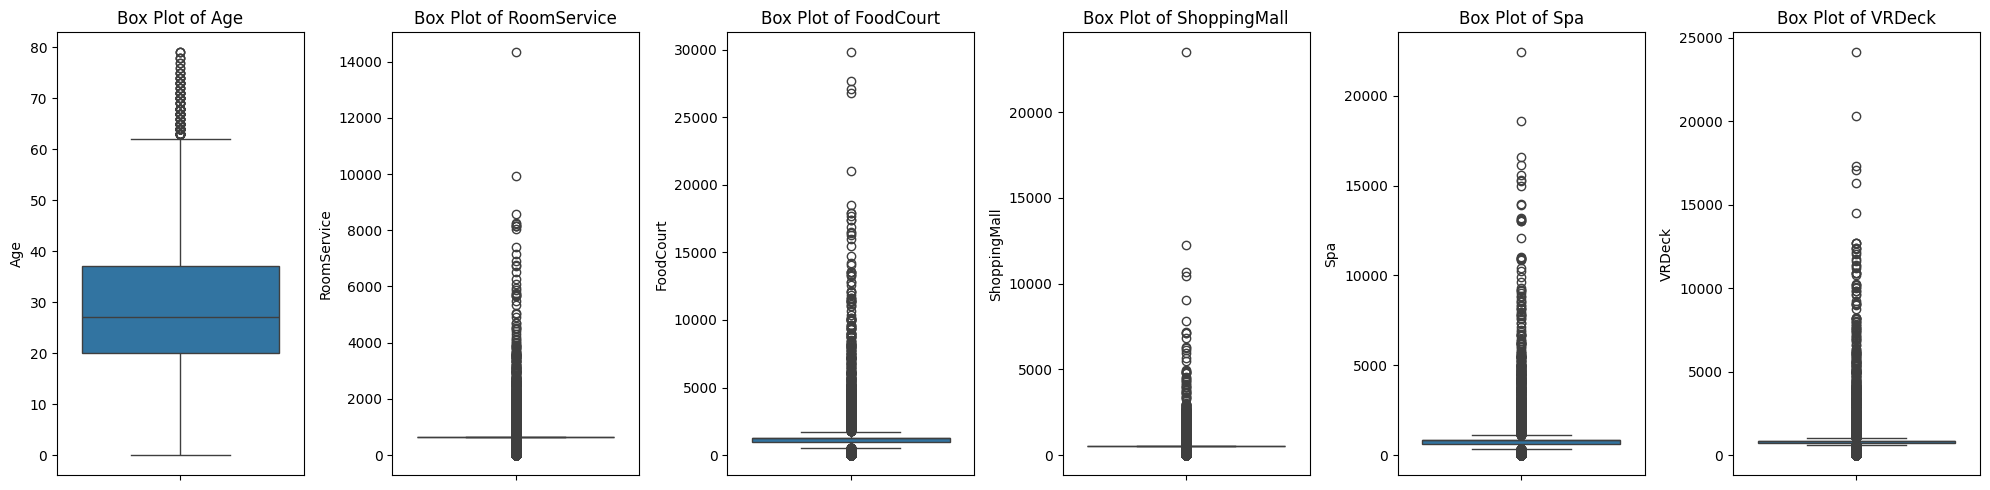

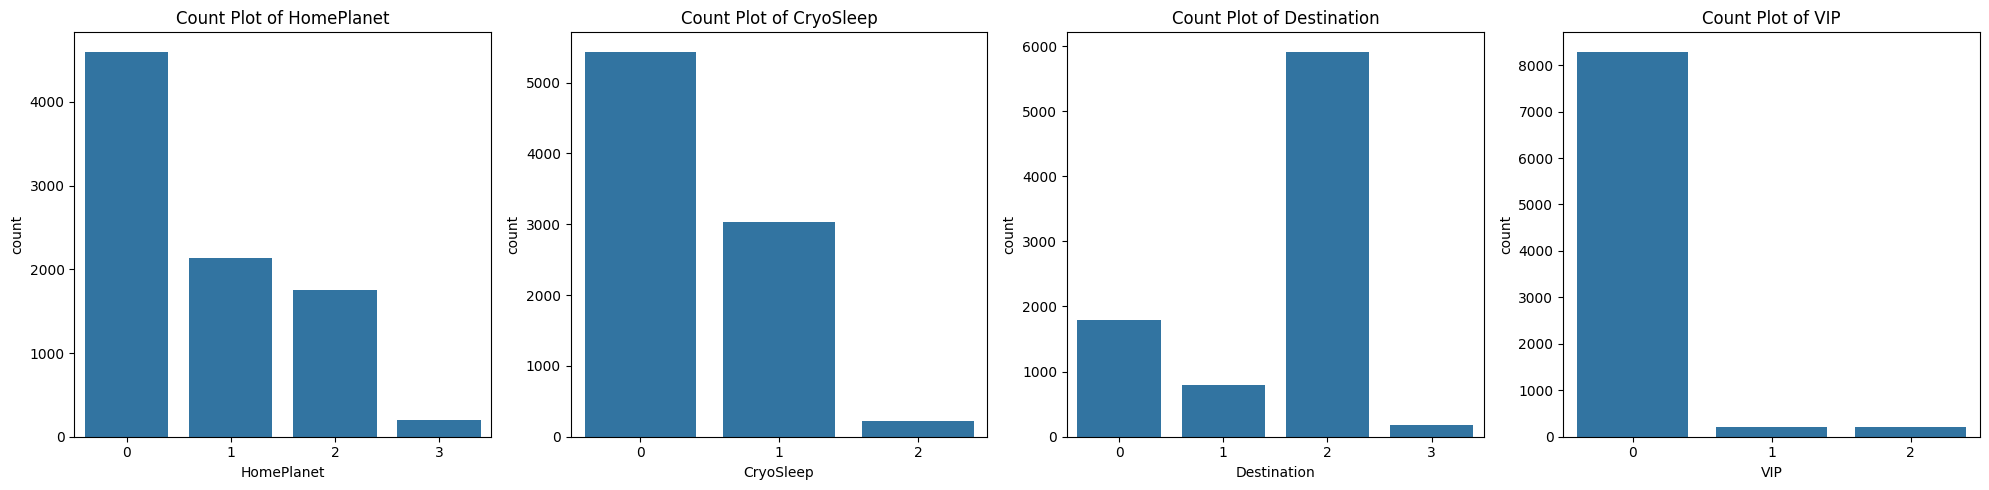

In [ ]:
# Encode categorical features using Label Encoding
label_encoders = {}
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'PassengerId']
for column in categorical_features:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column].astype(str))
    label_encoders[column] = le

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Distribution plots for numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, axs = plt.subplots(len(numerical_features), 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    sns.histplot(train[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Box plots to check for outliers
fig, axs = plt.subplots(1, len(numerical_features), figsize=(20, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=train[feature], ax=axs[i])
    axs[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig, axs = plt.subplots(1, len(categorical_features), figsize=(20, 5))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=train[feature], ax=axs[i])
    axs[i].set_title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()


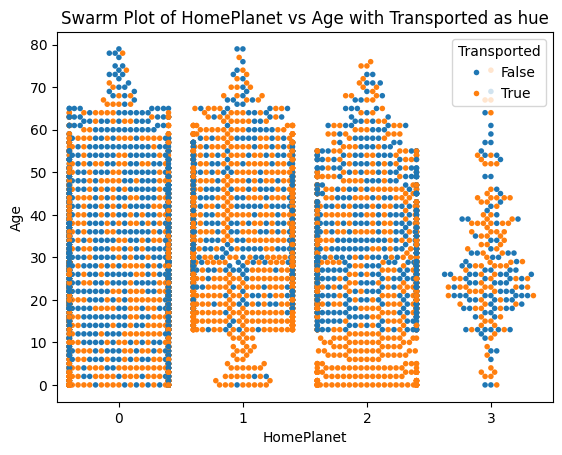

In [ ]:
# [Makeing a swarm plot of sex versus age, with the points coloured by the target variable (Transported).]
sns.swarmplot(x='HomePlanet', y='Age', hue='Transported', data=train, size=4)
plt.title('Swarm Plot of HomePlanet vs Age with Transported as hue')
plt.show()


In [ ]:
fig = px.treemap(train, path=['Transported', 'HomePlanet', 'Destination'], color='Age')
fig.show()

pair plot

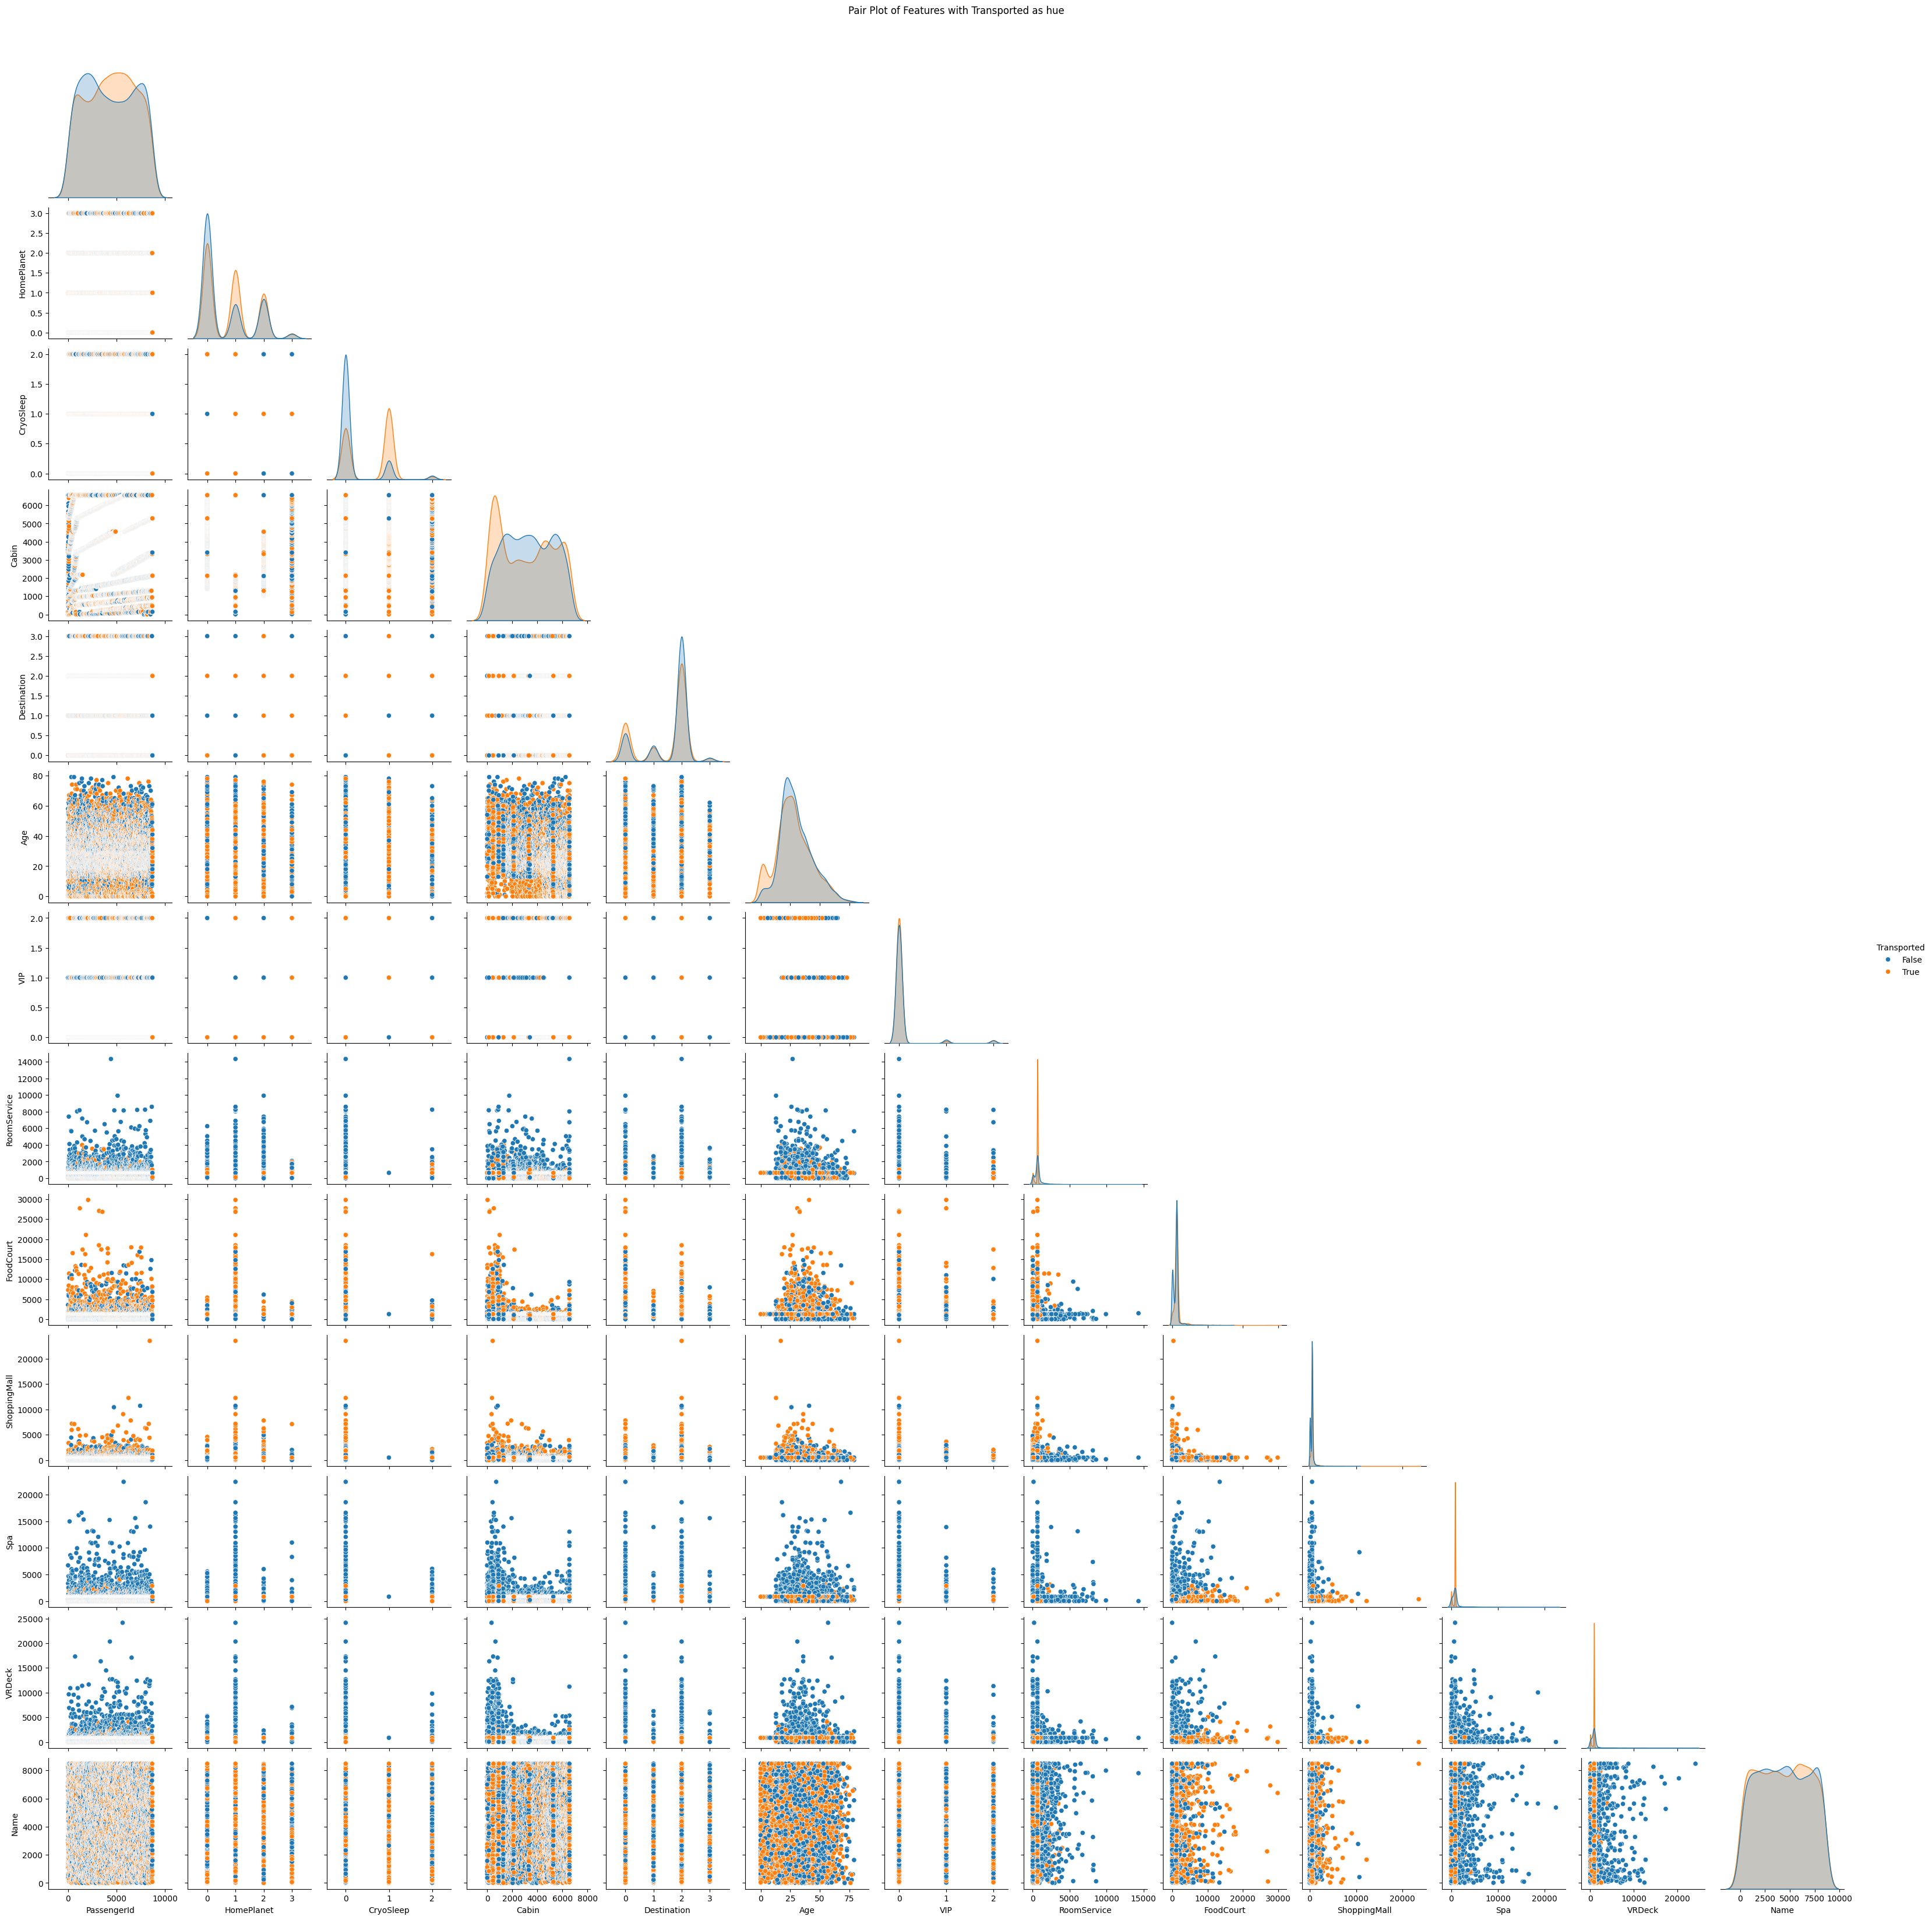

In [ ]:
sns.pairplot(train, hue='Transported', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features with Transported as hue', y=1.02)
plt.show()


PCA

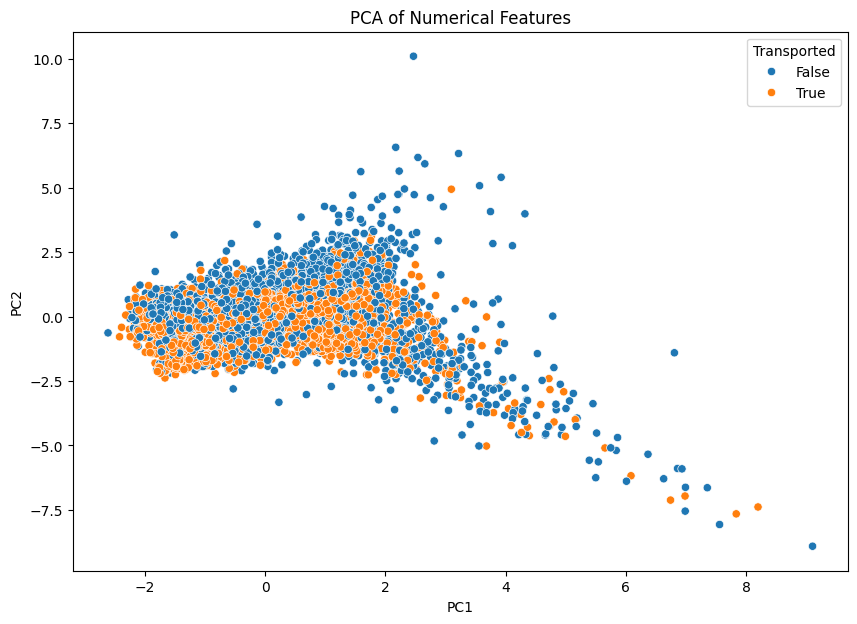

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train.select_dtypes(include=[np.number]))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Transported'] = train['Transported'].values

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Transported', data=pca_df)
plt.title('PCA of Numerical Features')
plt.show()


# 3) Pre-processing

Here, you can apply any pre-processing of the dataset that you may want to do before passing it to your ML model.

In [ ]:
# 1. Handling missing values
# Replace NaNs with most frequent value for categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
imputer_cat = SimpleImputer(strategy='most_frequent')
train[categorical_features] = imputer_cat.fit_transform(train[categorical_features])




In [ ]:
# 2. Encoding data
# Encoding the categorical features
label_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'PassengerId']
label_encoders = {}
for label in label_columns:
    le = LabelEncoder()
    train[label] = le.fit_transform(train[label].astype(str))
    label_encoders[label] = le
train.head()


PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0            0           1          0    149            2  39.0    0   
1            1           0          0   2184            2  24.0    0   
2            2           1          0      1            2  58.0    1   
3            3           1          0      1            2  33.0    0   
4            4           0          0   2186            2  16.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0          0.0        0.0           0.0     0.0     0.0  5252        False  
1        109.0        9.0          25.0   549.0    44.0  4502         True  
2         43.0     3576.0           0.0  6715.0    49.0   457        False  
3          0.0     1283.0         371.0  3329.0   193.0  7149        False  
4        303.0       70.0         151.0   565.0     2.0  8319         True

In [ ]:
# Using get_dummies to encode the relevant features
df = pd.get_dummies(train, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'])
df.head()


PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0            0  39.0          0.0        0.0           0.0     0.0     0.0   
1            1  24.0        109.0        9.0          25.0   549.0    44.0   
2            2  58.0         43.0     3576.0           0.0  6715.0    49.0   
3            3  33.0          0.0     1283.0         371.0  3329.0   193.0   
4            4  16.0        303.0       70.0         151.0   565.0     2.0   

   Name  Transported  HomePlanet_0  ...  Cabin_6555  Cabin_6556  Cabin_6557  \
0  5252        False         False  ...       False       False       False   
1  4502         True          True  ...       False       False       False   
2   457        False         False  ...       False       False       False   
3  7149        False         False  ...       False       False       False   
4  8319         True          True  ...       False       False       False   

   Cabin_6558  Cabin_6559  Destination_0  Destination_1  Destination_2  VIP_0  \
0       False       False          False          False           True   True   
1       False       False          False          False           True   True   
2       False       False          False          False           True  False   
3       False       False          False          False           True   True   
4       False       False          False          False           True   True   

   VIP_1  
0  False  
1  False  
2   True  
3  False  
4  False  

[5 rows x 6579 columns]

In [ ]:
# 3. Scaling Numerical Features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])


In [ ]:
train_x = train.drop('Transported', axis=1)


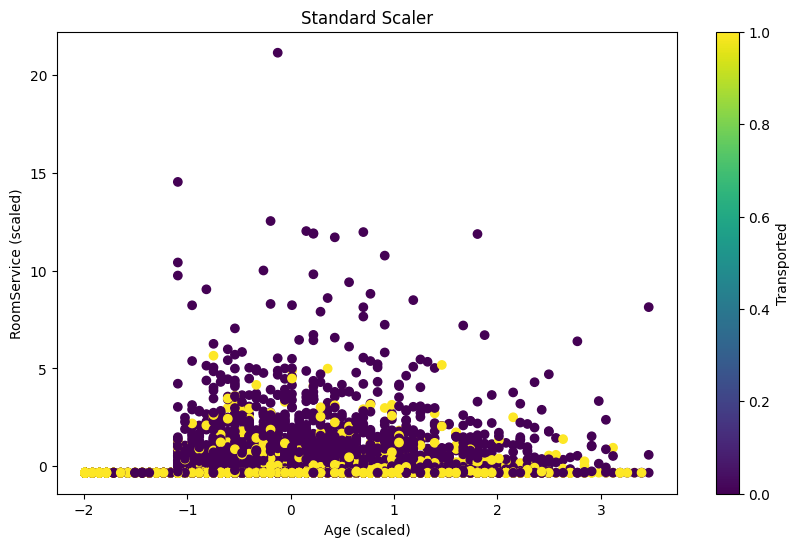

In [ ]:
# Standard scaler
scaler = StandardScaler()
train_scaled_np = scaler.fit_transform(train_x.values)
train_scaled = pd.DataFrame(train_scaled_np, index=train_x.index, columns=train_x.columns)
train_scaled.insert(0, 'Transported', train['Transported'], True)  # Adding the target variable column back again

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train_scaled['Age'], train_scaled['RoomService'], c=train_scaled['Transported'], cmap='viridis')
plt.xlabel('Age (scaled)')
plt.ylabel('RoomService (scaled)')
plt.title('Standard Scaler')
plt.colorbar(label='Transported')
plt.show()


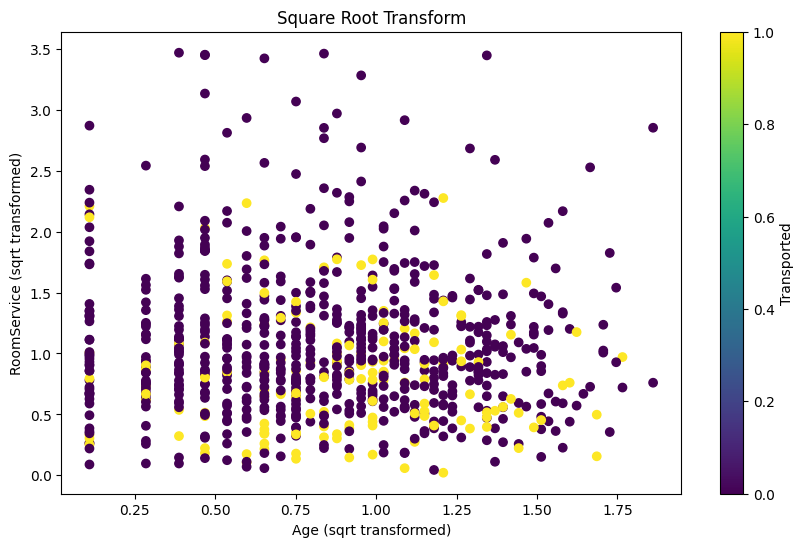

In [ ]:
#  Square Root Transform
train_sqrt = train_x.apply(np.sqrt)
train_sqrt.insert(0, 'Transported', train['Transported'], True)  # Add the target variable column back again

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train_sqrt['Age'], train_sqrt['RoomService'], c=train_sqrt['Transported'], cmap='viridis')
plt.xlabel('Age (sqrt transformed)')
plt.ylabel('RoomService (sqrt transformed)')
plt.title('Square Root Transform')
plt.colorbar(label='Transported')
plt.show()


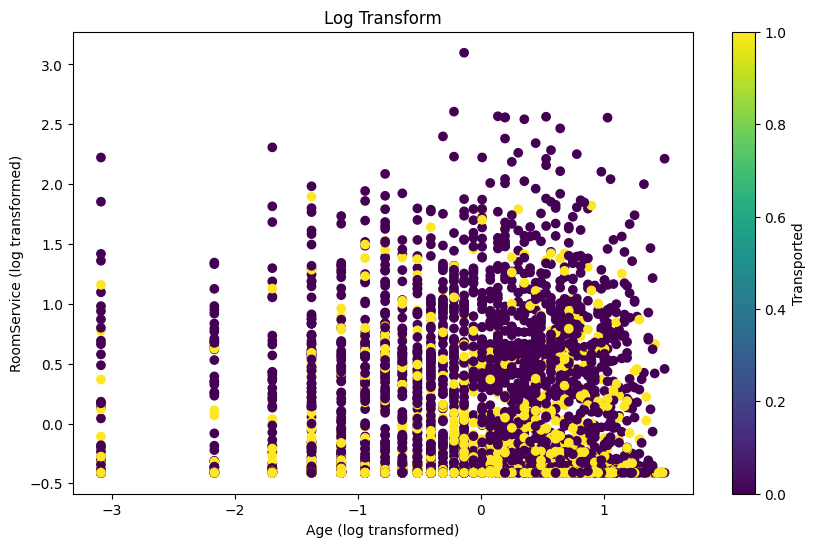

In [ ]:
# Log Transform
train_log = train_x.apply(np.log1p)
train_log.insert(0, 'Transported', train['Transported'], True)  # Add the target variable column back again

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train_log['Age'], train_log['RoomService'], c=train_log['Transported'], cmap='viridis')
plt.xlabel('Age (log transformed)')
plt.ylabel('RoomService (log transformed)')
plt.title('Log Transform')
plt.colorbar(label='Transported')
plt.show()


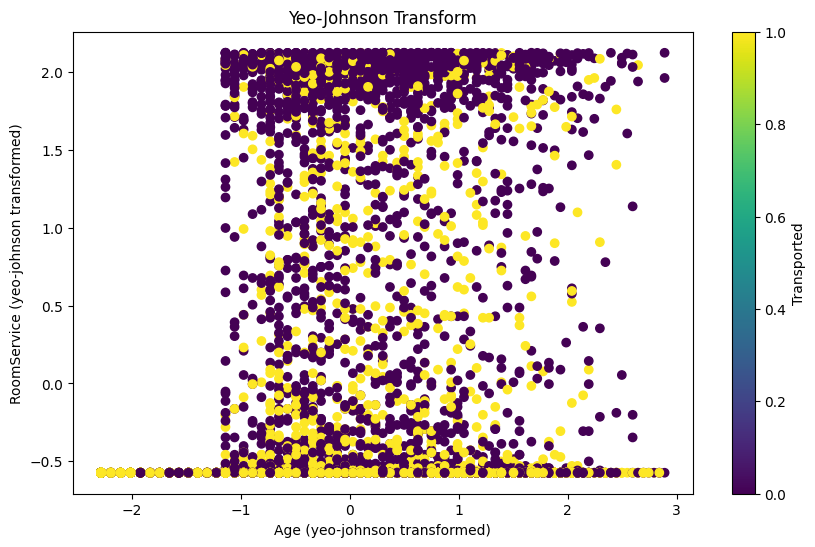

In [ ]:
# Yeo-Johnson Transform (works with zero and negative values)
pt = PowerTransformer(method='yeo-johnson')
train_yeojohnson_np = pt.fit_transform(train_x.values)
train_yeojohnson = pd.DataFrame(train_yeojohnson_np, index=train_x.index, columns=train_x.columns)
train_yeojohnson.insert(0, 'Transported', train['Transported'], True)  # Adding the target variable column back again

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train_yeojohnson['Age'], train_yeojohnson['RoomService'], c=train_yeojohnson['Transported'], cmap='viridis')
plt.xlabel('Age (yeo-johnson transformed)')
plt.ylabel('RoomService (yeo-johnson transformed)')
plt.title('Yeo-Johnson Transform')
plt.colorbar(label='Transported')
plt.show()


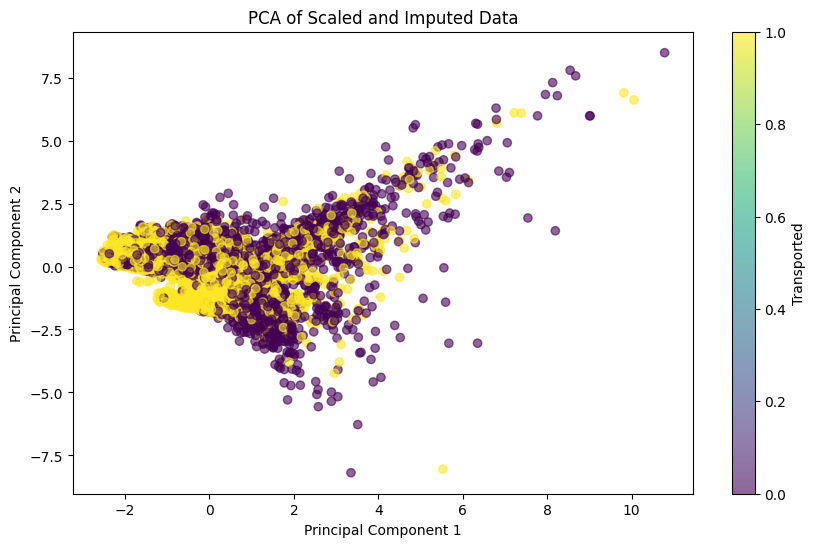

In [ ]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
train_scaled_imputed = imputer.fit_transform(train_scaled.drop('Transported', axis=1))

# PCA (on the scaled and imputed data)
pca = PCA(n_components=2)  # n_components = number of PCs to keep
train_pca_np = pca.fit_transform(train_scaled_imputed)
train_pca = pd.DataFrame(train_pca_np, index=train_scaled.index, columns=['PC1', 'PC2'])
train_pca['Transported'] = train['Transported'].values  # Adding the target variable column back again

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_pca['PC1'], train_pca['PC2'], c=train_pca['Transported'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Scaled and Imputed Data')
plt.colorbar(scatter, label='Transported')
plt.show()


# 4) Modelling

Here, you can train & test the ML model(s) you wish to use to predict which passengers were "transported".

In [ ]:
# [Add code for selecting, training, testing, and optimising your ML model(s) here]


In [ ]:

# Impute missing values with the mean of each column before splitting the data
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(train_scaled.drop('Transported', axis=1))

# Convert imputed data back to DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=train_scaled.drop('Transported', axis=1).columns)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, train['Transported'], test_size=0.2, random_state=42)

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Setting up GridSearch to find the best parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
predictions = best_rf.predict(X_test)

# Evaluating the model
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

       False       0.80      0.75      0.78       861
        True       0.77      0.82      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Accuracy: 0.7872340425531915


# 5) Analysis & XAI

Here, you can make plots illustrating the efficiency, etc, of your models, and apply any XAI methods you think would  be useful for understanding which features were most important in predicting the target variable. *italicised text*

In [ ]:
# [Add code for visualising your model's efficiency and any XAI methodologies here]

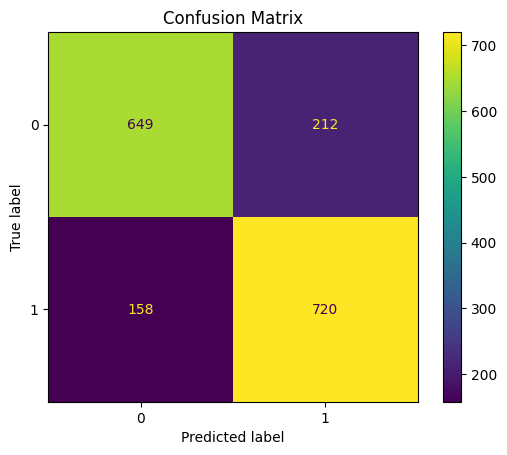

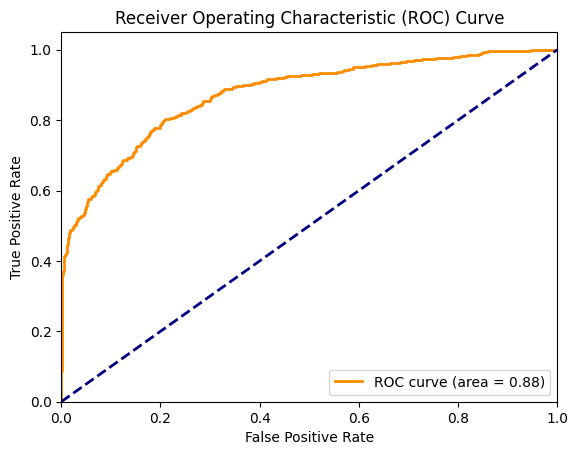

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SHAP Values

In [ ]:
# Prepare the data
X = train.drop('Transported', axis=1)
y = train['Transported']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median' or 'most_frequent' if it makes more sense for your data
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Output the shapes of the SHAP values to ensure they are computed correctly
print(f"SHAP values shape: {len(shap_values)} classes")
for i, vals in enumerate(shap_values):
    print(f"Class {i}: {vals.shape} - should be (n_samples, n_features)")


SHAP values shape: 1739 classes
Class 0: (13, 2) - should be (n_samples, n_features)
Class 1: (13, 2) - should be (n_samples, n_features)
Class 2: (13, 2) - should be (n_samples, n_features)
Class 3: (13, 2) - should be (n_samples, n_features)
Class 4: (13, 2) - should be (n_samples, n_features)
Class 5: (13, 2) - should be (n_samples, n_features)
Class 6: (13, 2) - should be (n_samples, n_features)
Class 7: (13, 2) - should be (n_samples, n_features)
Class 8: (13, 2) - should be (n_samples, n_features)
Class 9: (13, 2) - should be (n_samples, n_features)
Class 10: (13, 2) - should be (n_samples, n_features)
Class 11: (13, 2) - should be (n_samples, n_features)
Class 12: (13, 2) - should be (n_samples, n_features)
Class 13: (13, 2) - should be (n_samples, n_features)
Class 14: (13, 2) - should be (n_samples, n_features)
Class 15: (13, 2) - should be (n_samples, n_features)
Class 16: (13, 2) - should be (n_samples, n_features)
Class 17: (13, 2) - should be (n_samples, n_features)
Class 

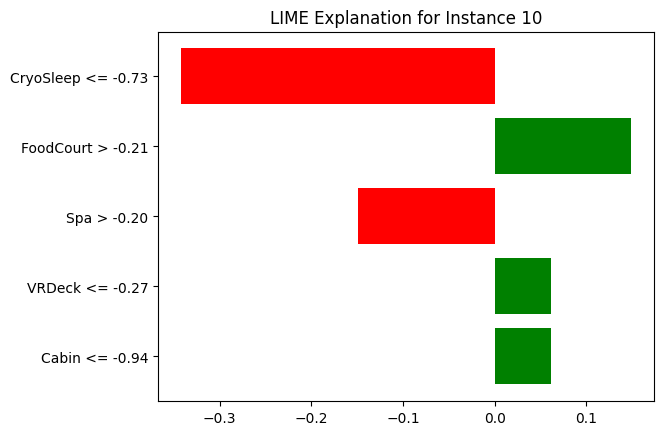

In [ ]:

X = train.drop('Transported', axis=1)
y = train['Transported']

# Impute missing values and scale the features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=train.drop('Transported', axis=1).columns.tolist(),
    class_names=['Not Transported', 'Transported'],
    mode='classification'
)

# Choose an instance to explain
i = 10  # Index of the instance to explain
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=5)

# Visualize the explanation for the chosen instance
fig = exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Instance {i}')
plt.show()


In [ ]:
# Assuming binary classification and you want to visualize the SHAP values for the positive class (typically 1)
class_index = 1  # or 0 for the other class depending on your interest
prediction_index = 0  # Index of the prediction to visualize

# Check the specific SHAP values for the first prediction in the desired class
print("SHAP values for the first prediction, positive class:", shap_values[class_index][prediction_index].shape)


SHAP values for the first prediction, positive class: (2,)


In [ ]:
# For binary classification, usually index `1` is used for the positive class
class_index = 1
prediction_index = 0  # Adjust as needed to explore other predictions

# Plot SHAP force plot
try:
    shap.force_plot(
        explainer.expected_value[class_index],
        shap_values[class_index][prediction_index, :],
        X_test.iloc[prediction_index, :],
        show=False
    )
    plt.title('SHAP Force Plot for the First Prediction')
    plt.show()
except Exception as e:
    print("Error in plotting SHAP force plot:", e)


Error in plotting SHAP force plot: Length of features is not equal to the length of shap_values!


# 6) Prepare predicitons for submission

Here, you can extract the results needed for the submission to Kaggle. This has to be in a certian format.

A basic example code for this is provided below. The .csv file it produces can then  be uploaded to Kaggle on the [Kaggle Challenge webpage](https://www.kaggle.com/competitions/spaceship-titanic/submissions).

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer (assuming you want to fill numerical NaNs with the mean of the column)
imputer = SimpleImputer(strategy='mean')

# Assuming 'numerical_features' is a list of your numerical columns that might have NaNs
test[numerical_features] = imputer.fit_transform(test[numerical_features])

# Now, re-check and ensure no NaN values remain in the test data
if test.isnull().any().any():
    print("There are still NaNs in the test data.")

# Apply the scaler (assuming you already have a fitted scaler from your training data)
test_scaled = scaler.transform(test[test_x.columns])  # Make sure you're scaling the correct columns

# Convert scaled array back to DataFrame (important if your model expects a DataFrame input)
test_scaled = pd.DataFrame(test_scaled, columns=test_x.columns)

# Predict using the best model
y_pred = best_rf.predict(test_scaled)

# Prepare the Kaggle submission file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': y_pred.astype(bool)  # Convert numerical predictions back to Boolean if necessary
})

# Write the DataFrame to a .csv file
submission.to_csv('submission_Test.csv', index=False)

# If using Google Colab, download the .csv file
files.download("submission_Test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>